#都内にある賭けない麻雀店（ノーレート店）のマップ

In [5]:
# library import
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [8]:
# import the csv file
df = pd.read_csv('homework.csv')

In [9]:
df

,name,description,latitude,longitude,color,icon
0,まーすた下北沢店,健康マージャン、麻雀教室、ノーレートフリーが遊べるお店。下北沢駅から徒歩3分。,35.662227,139.669463,green,map-marker
1,まーすた王子店,健康マージャン、麻雀教室、ノーレートフリーが遊べるお店。王子駅から徒歩4分。,35.755542,139.738006,green,map-marker
2,てんぱね,ノーレート麻雀とRPGを融合したシステムで、コスプレをした女の子と麻雀が打てる。秋葉原駅から...,35.702853,139.770737,green,map-marker
3,健康麻将&居酒屋麻雀ガラパゴス 高田馬場店,日本健康麻将協会所属店。海鮮丼付き飲み放題の居酒屋マージャン店。夜は居酒屋セット麻雀営業だが...,35.711751,139.708628,green,map-marker
4,麻雀ラブリースマイル ノーレートフリー雀荘,ノーレート雀荘。店内禁煙。中野駅周辺唯一のノーレート店。中野駅から徒歩5分。,35.703375,139.664997,green,map-marker
5,「かぼちゃ倶楽部」健康マージャン教室 両国カルチャーセンター,幅広い年代から愛されるお店。経験者コースや個人レッスンなど様々な層に対応。両国駅から徒歩1分。,35.696339,139.791207,green,map-marker
6,健康麻雀 ひよこ堂,日本プロ麻雀連盟公式ルールのノーレートフリーが遊べるお店。麻雀教室も開講中。浅草橋から徒歩1分。,35.698210,139.786383,green,map-marker
7,しぶとん,ノーレートフリーマージャン店。実力をレートに換算したシステムや月間賞など商品が盛りだくさん。...,35.657152,139.697432,green,map-marker
8,雀友倶楽部 秋葉原店～ノーレート健康マージャン～,ノーレート競技サロン。健康マージャンや初心者教室、レベルアップ講座など様々なレベルの層に対応...,35.698631,139.776344,red,heart
9,麻雀OZ,完全禁煙のお店。月、水は女性限定の麻雀教室を開催。火、木は健康マージャンが楽しめる。高田馬場...,35.711978,139.704180,green,map-marker


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         12 non-null     object 
 1   description  12 non-null     object 
 2   latitude     12 non-null     float64
 3   longitude    12 non-null     float64
 4   color        12 non-null     object 
 5   icon         12 non-null     object 
dtypes: float64(2), object(4)
memory usage: 708.0+ bytes


<Axes: xlabel='longitude', ylabel='latitude'>

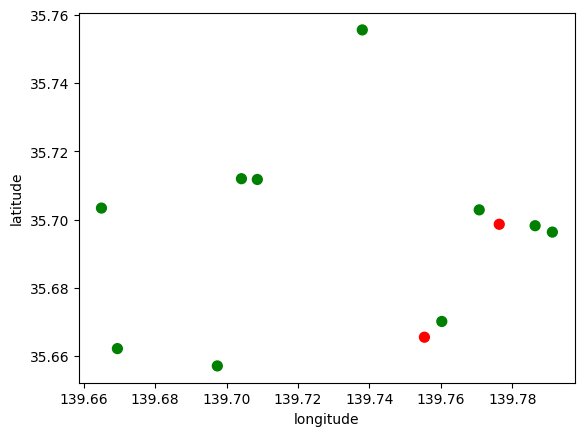

In [11]:
df.plot.scatter(x='longitude',y='latitude',c='color',s=50)

In [12]:
# complete the following code:
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()
print(center_lat)
print(center_lon)

35.69448272653246
139.73525308941467


In [16]:
# make the map
m = folium.Map(location=[center_lat,center_lon], zoom_start=12)

# df をループしてマーカーを作る
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, 
                  popup='<div style="width:350px">'+row['description']+'</div>', 
                  tooltip=row['name'],
                  icon=folium.Icon(color=row['color'],icon=row['icon']
                )).add_to(m)

# show the map
m

In [18]:
m.save("map.html")